In [30]:
import torch 
from torch import nn
import torchvision
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy

In [2]:
#Download Data and transform the images to tensors that are normalized 

train_data = torchvision.datasets.MNIST('/files/', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ]))



test_data = torchvision.datasets.MNIST('/files/', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ]))


  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting /files/MNIST/raw/train-images-idx3-ubyte.gz to /files/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting /files/MNIST/raw/train-labels-idx1-ubyte.gz to /files/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting /files/MNIST/raw/t10k-images-idx3-ubyte.gz to /files/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting /files/MNIST/raw/t10k-labels-idx1-ubyte.gz to /files/MNIST/raw



In [40]:
train_dataloader = DataLoader(train_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=1, shuffle=True)

In [9]:
train_features, train_labels = next(iter(train_dataloader))

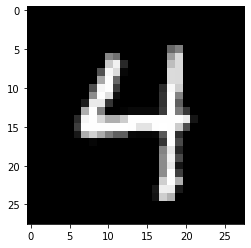

Label: 4


In [12]:
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

In [17]:
class MLP(nn.Module):
    def __init__(self, input_dim_0, input_dim_1):
        super(MLP, self).__init__()
        
        self.flatten = nn.Flatten()

        self.linear_relu_stack = nn.Sequential(
            
            nn.Linear(input_dim_0*input_dim_1, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )      


    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits



In [21]:
network = MLP(28,28)
optim = torch.optim.SGD(network.parameters(), lr=.01)
loss_func = nn.CrossEntropyLoss()

In [26]:
EPOCHS = 50

val_losses = []
for epoch in range(EPOCHS):
    print(epoch)
    for batch_idx, batch in enumerate(train_dataloader):
        image_batch, lable_batch = batch
        lablehat_batch = network(image_batch)

        loss = loss_func(lablehat_batch, lable_batch)
        optim.zero_grad()
        loss.backward()
        optim.step()

        # lr_scheduler.step()
    
    yhat_val = network(image_batch)
    val_loss = loss_func(lablehat_batch, lable_batch)
    val_losses.append(val_loss.detach().item())
    print(val_loss)


import os
torch.save(network.state_dict(), 'model.ckpt')

0
tensor(0.0125, grad_fn=<NllLossBackward0>)
1
tensor(0.0015, grad_fn=<NllLossBackward0>)
2
tensor(0.0334, grad_fn=<NllLossBackward0>)
3
tensor(0.1417, grad_fn=<NllLossBackward0>)
4
tensor(0.0135, grad_fn=<NllLossBackward0>)
5
tensor(0.0064, grad_fn=<NllLossBackward0>)
6
tensor(0.0053, grad_fn=<NllLossBackward0>)
7
tensor(0.0534, grad_fn=<NllLossBackward0>)
8
tensor(0.0497, grad_fn=<NllLossBackward0>)
9
tensor(0.0084, grad_fn=<NllLossBackward0>)
10
tensor(0.0097, grad_fn=<NllLossBackward0>)
11
tensor(0.0084, grad_fn=<NllLossBackward0>)
12
tensor(0.0020, grad_fn=<NllLossBackward0>)
13
tensor(0.0022, grad_fn=<NllLossBackward0>)
14
tensor(0.0003, grad_fn=<NllLossBackward0>)
15
tensor(0.0030, grad_fn=<NllLossBackward0>)
16
tensor(0.0026, grad_fn=<NllLossBackward0>)
17
tensor(0.0067, grad_fn=<NllLossBackward0>)
18
tensor(0.0059, grad_fn=<NllLossBackward0>)
19
tensor(0.0016, grad_fn=<NllLossBackward0>)
20
tensor(0.0012, grad_fn=<NllLossBackward0>)
21
tensor(0.0018, grad_fn=<NllLossBackward0>

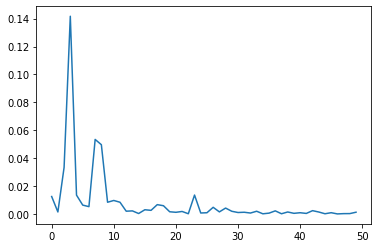

In [27]:
plt.plot(val_losses, label='train loss')

In [45]:
correct = 0
num_test = 0
for batch_idx, batch in enumerate(test_dataloader):
        num_test = 1 + num_test
        image_batch, lable_batch = batch
        lablehat_batch = network(image_batch)
        prediction = (nn.Softmax(1)(lablehat_batch)).argmax(1)
        if(prediction == lable_batch):
          correct = 1 + correct
print(100*correct/num_test)

98.18
